# Initialization

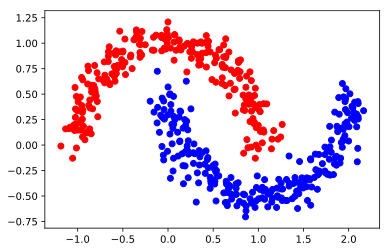

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons

n = 500
n_labeled = 10
alpha = 0.99
sigma = 0.2

#X = np.loadtxt("moon_data.txt")
#Y = np.loadtxt("class.txt")

X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=None)

color = ['red' if l == 0 else 'blue' for l in Y]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.savefig("ideal_classification.pdf", format='pdf')
plt.show()

Y_input = np.concatenate(((Y[:n_labeled,None] == np.arange(2)).astype(float), np.zeros((n-n_labeled,2))))

## Step 1: Construct the affinity matrix W

In [12]:
dm = cdist(X, X, 'euclidean')
rbf = lambda x, sigma: math.exp((-x)/(2*(math.pow(sigma,2))))
vfunc = np.vectorize(rbf)
W = vfunc(dm, sigma)
np.fill_diagonal(W, 0)

## Step 2: Calculate S such as S = D^(-1/2)*W*D^(-1/2)

In [13]:
sum_lines = np.sum(W,axis=1)
D = np.diag(sum_lines)

from scipy.linalg import fractional_matrix_power
D = fractional_matrix_power(D, -0.5)
S = np.dot(np.dot(D,W), D)

## Result of one iteration

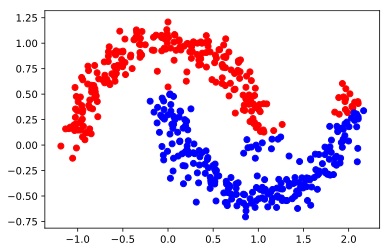

In [14]:
F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input

Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.savefig("iter_1.pdf", format='pdf')
plt.show()

## Step 3: Iterate F(t) t times until it converge.

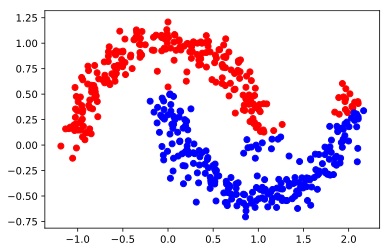

In [15]:
Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.savefig("iter_n.pdf", format='pdf')
plt.show()

In [16]:
n_iter = 400

F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input
for t in range(n_iter):
    F = np.dot(S, F)*alpha + (1-alpha)*Y_input

## Step 4: Classify X according to F.

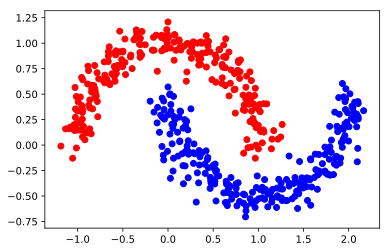

In [17]:
Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.savefig("iter_n.pdf", format='pdf')
plt.show()